In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import imp
import sys
sys.path.insert(0,'/home/robin/Projects/INM6/elephant')
sys.path.append('/home/robin/Projects/INM6/python-neo')
# sys.path.insert(0,'/home/robin/Projects/simrest_validation')
sys.path.insert(0,'/home/robin/Projects/NetworkUnit')
sys.path.append('/home/robin/Projects/INM6/Tasks/')
from viziphant.plots.rasterplot import rasterplot
from elephant.spike_train_surrogates import * 
from elephant.statistics import mean_firing_rate, cv, isi
from networkunit import models, tests, scores
from networkunit.plots import alpha
import seaborn as sns
from quantities import Hz, ms
from scipy.linalg import eigh
from time import time
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())
rc('text', usetex=True)
font_size = 24
text_size = 26
sns.set(style='ticks', palette='Set2', context='poster')

## Test Networks

In [65]:
size = 100
A_A = [10, 6, 3]
cc_A = [.2, .2, .3]
A_B = [10, 13, 3]
cc_B = [.4, .2, .3]
rate = 10*Hz
tstart = 0*ms
tstop = 10000*ms
binsize = 2*ms

model_A = models.stochastic_activity(size=size, correlations=cc_A, assembly_sizes=A_A,
                                correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                shuffle=False, name='A', color=sns.color_palette('Set2')[2])

model_B = models.stochastic_activity(size=size, correlations=cc_B, assembly_sizes=A_B,
                                correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                shuffle=False, name='B', color=sns.color_palette('Set2')[1])
for i in range(sum(A_B)):
    model_B.spiketrains[i].annotations['Assembly'] += 'B'

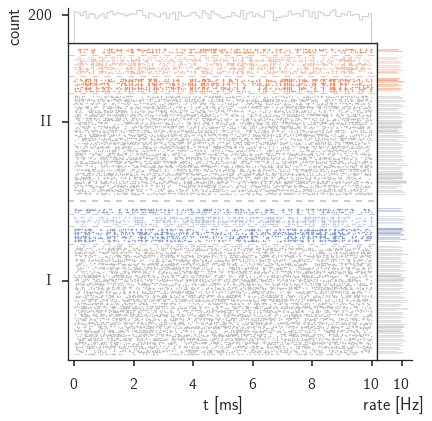

In [160]:
sns.set(style='ticks', palette='Set2', context='poster')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig.tight_layout()

c_A = model_A.color
c_B = model_B.color
colors = [alpha('#000000',.25)] + [c_A,alpha(c_A,.6),c_A] + [c_B,alpha(c_B,.6),c_B]

ax, axhistx, axhisty = rasterplot(model_A.spiketrains + model_B.spiketrains, ax=ax, key_list=['Model', 'Assembly'], 
           groupingdepth=2, spacing=[10,3], palette=colors, colorkey='Assembly', pophist_mode='total',
           labelkey=0, context='poster', markerargs={'markersize':3,'marker':'.'})
ax.set_xticklabels([0,0,2,4,6,8,10])
axhisty.set_xlabel('rate [Hz]')
axhisty.set_xticklabels([10])
axhistx.set_ylabel('count')
ax.set_yticklabels([r'$\mathrm{I}$',r'$\mathrm{II}$'])

plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/rasterplot_method_test_data.pdf', bbox_inches='tight')

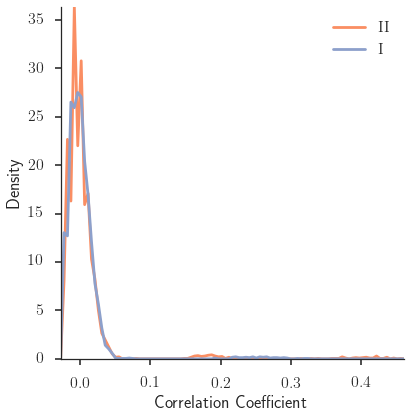

In [125]:
# from networkunit.tests.base_tests import correlation_test, model2model_test

class m2m_cov_kl_test_2msbins_100sample(tests.correlation_dist_test, tests.model2model_test):
    score_type = scores.kl_divergence
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms}
    
test = m2m_cov_kl_test_2msbins_100sample(model_B)

sns.set(style='ticks', palette='Set2', context='poster')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig.tight_layout()
sns.despine()

test.visualize_samples(model_A, ax=ax, sample_names=['B','A'], var_name='Correlation Coefficient')
ax.legend([r'$\mathrm{II}$',r'$\mathrm{I}$'])

plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/dist_method_test_data.pdf', bbox_inches='tight')

## Kullback Leibler Divergence

In [127]:
# from networkunit.tests.base_tests import correlation_test, model2model_test

class m2m_cov_kl_test_2msbins_100sample(tests.correlation_dist_test, tests.model2model_test):
    score_type = scores.kl_divergence
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms}

test = m2m_cov_kl_test_2msbins_100sample(model_A)

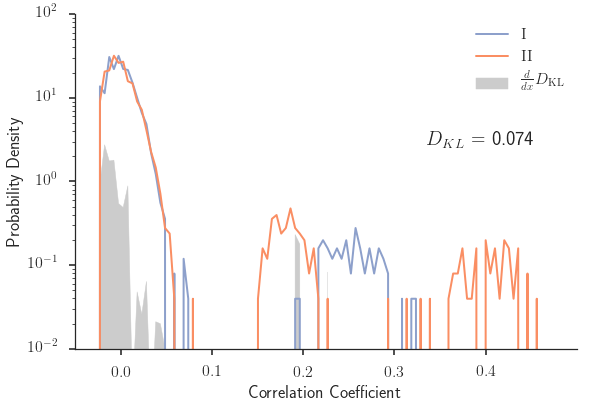

In [132]:
sns.set(style='ticks', palette='Set2', context='poster')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
# fig.tight_layout()

test.visualize_score(model_B, ax=ax, var_name='Correlation Coefficient')
ax.set_xlim((-.05,.5))
ax.set_ylim((0.01,100))
sns.despine()

score = test.judge(model_B)

ax.text(.7, .6, r'$D_{KL}$ = ' + '{:.3f}'.format(score.score), 
        fontsize=20, transform=ax.transAxes)

h, l = ax.get_legend_handles_labels()
ax.legend([h[0],h[1],h[2]], [r'$\mathrm{I}$',r'$\mathrm{II}$',r'$\frac{d}{dx} D_\mathrm{KL}$'])

plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/DKL_example.pdf', bbox_inches='tight')

## Kolmogorov Smirnov Distance

In [171]:
# from networkunit.tests.base_tests import correlation_test, model2model_test

class m2m_cov_kl_test_2msbins_100sample(tests.correlation_dist_test, tests.model2model_test):
    score_type = scores.ks_distance
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms}

test = m2m_cov_kl_test_2msbins_100sample(model_A)

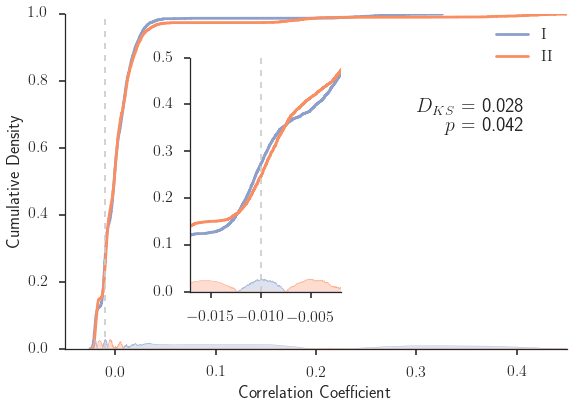

In [182]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

sns.set(style='ticks', palette='Set2', context='poster')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
# fig.tight_layout()

test.visualize_score(model_B, ax=ax, var_name='Correlation Coefficient')
ax.set_xlim((-.05,.45))
sns.despine()

score = test.judge(model_B)

ax.text(.7, .7, r'$D_{KS}$ = ' + '{:.3f}'.format(score.score), 
        fontsize=20, transform=ax.transAxes)
ax.text(.755, .65, r'$p$ = ' + '{:.3f}'.format(score.pvalue), 
        fontsize=20, transform=ax.transAxes)

ax.set_ylabel('Cumulative Density')

# insaxes = inset_axes(ax, width="35%", height=1.5, bbox_to_anchor=(1,1), loc=3)
insaxes = plt.axes([0, 0, 1, 1])
ip = InsetPosition(ax, [0.25, 0.17, 0.3, 0.7]) #posx, posy, width, height
insaxes.set_axes_locator(ip)

test.visualize_score(model_B, ax=insaxes, var_name='')

# insaxes.set_xlim((-0.014,-0.006))
# insaxes.set_ylim(0,0.4)
insaxes.set_xlim((-0.017,-0.002))
insaxes.set_ylim(0,0.5)
insaxes.set_xlabel('')
insaxes.set_ylabel('')
insaxes.set_xticks([-0.015,-0.01,-0.005])
insaxes.legend().set_visible(False)
sns.despine()

ax.legend([r'$\mathrm{I}$',r'$\mathrm{II}$'])
plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/DKS_example.pdf', bbox_inches='tight')

## Mann-Whitney U

In [136]:
# from networkunit.tests.base_tests import correlation_test, model2model_test

class m2m_cov_kl_test_2msbins_100sample(tests.correlation_dist_test, tests.model2model_test):
    score_type = scores.mwu_statistic
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms}

test = m2m_cov_kl_test_2msbins_100sample(model_A)

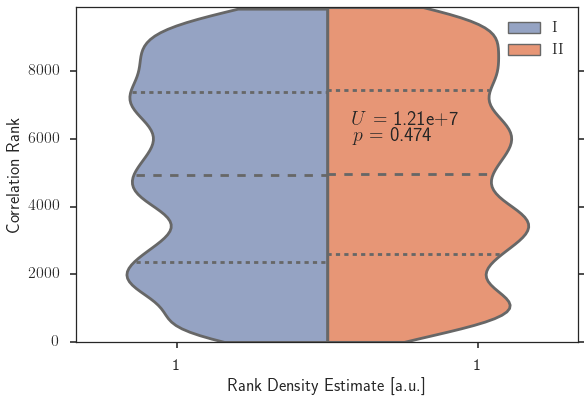

In [148]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from networkunit.scores import to_precision

sns.set(style='ticks', palette='Set2', context='poster')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
# fig.tight_layout()

model_A.name = r'$\mathrm{I}$'
model_B.name = r'$\mathrm{II}$'

test.visualize_score(model_B, ax=ax, var_name='Correlation') 
L=plt.legend()
L.get_texts()[0].set_text(r'$\mathrm{I}$')

ax.tick_params(axis='x', which='both', bottom='on', top='off', labelbottom='on')
ax.set_xticks([-.3,.3])
ax.set_xticklabels(['1','1'])
ax.set_xlabel('Rank Density Estimate [a.u.]')

score = test.judge(model_B)

ax.text(.55, .65, r'$U$ = ' + '{}'.format(to_precision(score.score,3)), 
        fontsize=20, transform=ax.transAxes)
ax.text(.55, .6, r'$p$ = ' + '{:.3f}'.format(score.pvalue), 
        fontsize=20, transform=ax.transAxes)

plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/MWU_example.pdf', bbox_inches='tight')

### Effect Size

In [149]:
def s_pooled(sample1, sample2):
    n = len(sample1)
    s = np.std(sample1)
    nn = len(sample2)
    sn = np.std(sample2)
    return np.sqrt(((n-1.)*s**2 + (nn-1.)*sn**2) / (n+nn-2.))

def effect_size(sample1, sample2):
    return abs(np.mean(sample1) - np.mean(sample2)) / s_pooled(sample1, sample2)

def CI(sample1, sample2):
    n = len(sample1)
    nn = len(sample2)
    es = effect_size(sample1,sample2)
    return 1.96*np.sqrt((n+nn)/(n*nn) + es**2/(2.*(n+nn-2.)))

In [150]:
sample_A = test.generate_prediction(model_A)
sample_B = test.generate_prediction(model_B)

es = effect_size(sample_A, sample_B)
s_es = CI(sample_A,sample_B)
s_sample = s_pooled(sample_A, sample_B)
print es, '+-', s_es

0.081252191382 +- 0.00113188533096


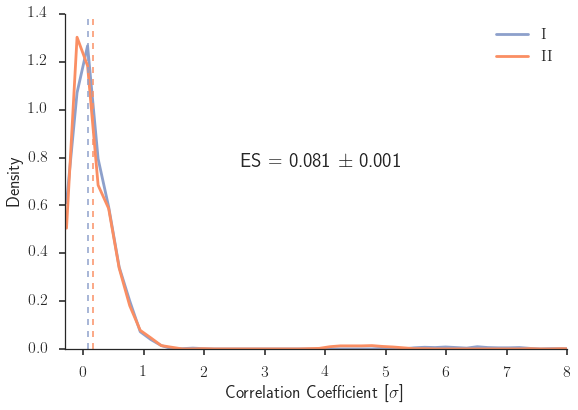

In [153]:
A = sample_A / s_sample
B = sample_B / s_sample

mincc = min([min(A),min(B)])
maxcc = max([max(A),max(B)])

edges = np.linspace(mincc,maxcc,70)
xvalues = edges[:-1]
xvalues = xvalues + edges[1] - edges[0]

hist_A, __ = np.histogram(A, bins=edges, density=True)
hist_B, __ = np.histogram(B, bins=edges, density=True)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

ax.plot(xvalues, hist_A, color=model_A.color, label='A')
ax.plot(xvalues, hist_B, color=model_B.color, label='B')

ax.axvline(np.mean(A), color=model_A.color, ls='--', lw=1.5)
ax.axvline(np.mean(B), color=model_B.color, ls='--', lw=1.5)

ax.text(.35, .55, 'ES = {} '.format(to_precision(es,2)) + r'$\pm$' + ' {:.3f}'.format(s_es), 
        fontsize=20, transform=ax.transAxes)

ax.set_xlabel(r'Correlation Coefficient [$\sigma$]')
ax.set_ylabel('Density')
ax.legend()
ax.set_xlim((-.3,8))
ax.legend([r'$\mathrm{I}$',r'$\mathrm{II}$'])

sns.despine()
plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/effect_size_example.pdf', bbox_inches='tight')
plt.show()

### BEST Effect Size

In [199]:
class best_test(tests.correlation_dist_test, tests.model2model_test):
    score_type = scores.best_effect_size
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms,
              'mcmc_iter' : 110000,
              'mcmc_burn' : 10000,
              'effect_size_type': 'mean'
             }

test = best_test(model_A)

In [200]:
score = test.judge(model_B)

 [-----------------100%-----------------] 110000 of 110000 complete in 683.3 sec

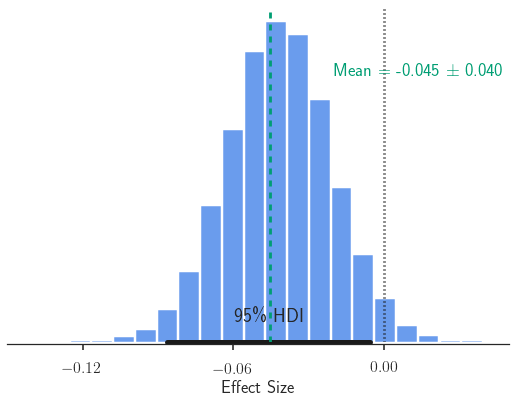

In [201]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6), sharey=True)
rc('text', usetex=True)

test.visualize_score(model_B, ax=ax)
ses = (score.HDI[1] - score.HDI[0])/2.

ax.text(.65,.8, 'Mean = {:.3f} '.format(score.score) + r'$\pm$' + ' {:.3f}'.format(ses), 
        fontsize=18, transform=ax.transAxes, color='g')
ax.axvline(score.score, color='g', ls='--')
ax.set_ylabel('')
           
plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/nest_spin_best.pdf', bbox_inches='tight')
plt.show()

## DKL Parameter Scan

In [2]:
class dkl_test(tests.correlation_dist_test, tests.model2model_test):
    score_type = scores.kl_divergence
    params = {'all_to_all': False,
              'two_sided': False,
              'alpha': 0.0001,
              'binsize': 2*ms,
              'bin_num': 5000}

    def compute_score(self, prediction1, prediction2):
        score = self.score_type.compute(prediction1, prediction2, **self.params)
        return score

size = 100
rate = 10*Hz
tstart = 0*ms
tstop = 10000*ms
binsize = 2*ms
B = int(tstop/binsize)
dkls = [0] * 99
count = 0

In [3]:
start_time = time()
for A in [[2],[3],[4],[5],[6],[7],[8],[9],[10]]:
    for cc in [0,.1,.2,.3,.4,.5,.6,.7,.8,.9, 1.]:
        temp = np.zeros(50)
        for repeat in range(50):
            model_A = models.stochastic_activity(size=size, correlations=0., assembly_sizes=[],
                                                correlation_method='HPP', t_start=tstart, t_stop=tstop,
                                                shuffle=False, name='A')
            model_B = models.stochastic_activity(size=size, correlations=cc, assembly_sizes=A,
                                                correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                                shuffle=False, name='B')
            test = dkl_test(model_A)
            score = test.judge(model_B)
            temp[repeat] = score.score
            
        m, s = divmod(time() - start_time, 60)
        h, m = divmod(m, 60)
        print 'time %d:%02d:%02d' % (h, m, s)
        dkls[count] = (np.mean(temp), np.std(temp))
        print 'A: ', A, ' cc: ', cc
        print dkls[count]
        count = count + 1

/usr/local/lib/python2.7/dist-packages/quantities/quantity.py:321: RuntimeWarning: divide by zero encountered in true_divide
  return np.true_divide(other, self)


time 0:04:21
A:  [2]  cc:  0
(0.012308419328581907, 0.0094306393661144072)
time 0:08:36
A:  [2]  cc:  0.1
(0.014692946400036105, 0.01388790375855441)
time 0:12:49
A:  [2]  cc:  0.2
(0.013212585364385087, 0.014291506254186901)
time 0:17:03
A:  [2]  cc:  0.3
(0.012311010010915606, 0.012549848194964748)
time 0:21:15
A:  [2]  cc:  0.4
(0.018066779776795317, 0.01867777828940646)
time 0:25:27
A:  [2]  cc:  0.5
(0.013631466960068551, 0.013818065069456782)
time 0:29:40
A:  [2]  cc:  0.6
(0.014214617218119958, 0.011740526033200136)
time 0:33:53
A:  [2]  cc:  0.7
(0.015845666288212698, 0.015941130455303341)
time 0:38:04
A:  [2]  cc:  0.8
(0.021499785320039818, 0.027297449883371721)
time 0:42:16
A:  [2]  cc:  0.9
(0.018366483701860458, 0.01624598999493464)
time 0:46:30
A:  [2]  cc:  1.0
(0.017701007754678259, 0.016833286757204073)
time 0:50:41
A:  [3]  cc:  0
(0.0091639986231247268, 0.0069223489827163675)
time 0:54:53
A:  [3]  cc:  0.1
(0.012344281212114016, 0.010518779969389892)
time 0:59:04
A: 

In [4]:
print dkls

[(0.012308419328581907, 0.0094306393661144072), (0.014692946400036105, 0.01388790375855441), (0.013212585364385087, 0.014291506254186901), (0.012311010010915606, 0.012549848194964748), (0.018066779776795317, 0.01867777828940646), (0.013631466960068551, 0.013818065069456782), (0.014214617218119958, 0.011740526033200136), (0.015845666288212698, 0.015941130455303341), (0.021499785320039818, 0.027297449883371721), (0.018366483701860458, 0.01624598999493464), (0.017701007754678259, 0.016833286757204073), (0.0091639986231247268, 0.0069223489827163675), (0.012344281212114016, 0.010518779969389892), (0.01285287585571987, 0.011692446177641586), (0.011807949393624935, 0.010513344150158806), (0.011515294330595845, 0.0084781587232532016), (0.016162065971962437, 0.012157747532113392), (0.014150468146323489, 0.011003851066657463), (0.013105810607468156, 0.01212129142142764), (0.017341598326090175, 0.017584892616575858), (0.014516718551723228, 0.01239403854243022), (0.01370552131590521, 0.01123622182

In [ ]:
[(0.012308419328581907, 0.0094306393661144072), (0.014692946400036105, 0.01388790375855441), (0.013212585364385087, 0.014291506254186901), (0.012311010010915606, 0.012549848194964748), (0.018066779776795317, 0.01867777828940646), (0.013631466960068551, 0.013818065069456782), (0.014214617218119958, 0.011740526033200136), (0.015845666288212698, 0.015941130455303341), (0.021499785320039818, 0.027297449883371721), (0.018366483701860458, 0.01624598999493464), (0.017701007754678259, 0.016833286757204073), (0.0091639986231247268, 0.0069223489827163675), (0.012344281212114016, 0.010518779969389892), (0.01285287585571987, 0.011692446177641586), (0.011807949393624935, 0.010513344150158806), (0.011515294330595845, 0.0084781587232532016), (0.016162065971962437, 0.012157747532113392), (0.014150468146323489, 0.011003851066657463), (0.013105810607468156, 0.01212129142142764), (0.017341598326090175, 0.017584892616575858), (0.014516718551723228, 0.01239403854243022), (0.01370552131590521, 0.011236221825564236), (0.011163931520660159, 0.0082741217294841664), (0.010272390219843084, 0.0093991916201453824), (0.010883796298034815, 0.0078685408298294676), (0.013301697126619702, 0.01088074471844399), (0.01342736479747636, 0.012485790510055822), (0.014181518182973203, 0.011267359590873065), (0.012511954477231966, 0.010645673880056087), (0.014646197303465378, 0.014794660567495361), (0.014616626747228818, 0.01543145064350453), (0.013526135175467963, 0.0094621583357189822), (0.019661258079287848, 0.017670685421803511), (0.011737954997487459, 0.009825162006313188), (0.011312666082932219, 0.011556931146772351), (0.014279497755911667, 0.012885536182927782), (0.014685873942170819, 0.013794489366279283), (0.013575691633911065, 0.011128983870372242), (0.014730980550875452, 0.016098836263944222), (0.015950270194686755, 0.015215470785109028), (0.014892543548634049, 0.016661710163727812), (0.015331287346935866, 0.013186360438211241), (0.015569092393365971, 0.012537627832017801), (0.017223288182668151, 0.019556624599658869), (0.012164440863643268, 0.013641893197086911), (0.012774655233148659, 0.010944683341280528), (0.013633124681321105, 0.014144532490569212), (0.015314038840394659, 0.014853485217577291), (0.013187385878912512, 0.011656247899320772), (0.014714551547508026, 0.012207662007320612), (0.016901405162586518, 0.018575437778736163), (0.013880849404375886, 0.0093551380079311876), (0.016904329131658694, 0.01798943538971319), (0.014163193410706225, 0.013455848197246996), (0.015974346927953232, 0.012769885679485456), (0.010047312289086802, 0.0063111717289260202), (0.012719659077889165, 0.011765564831427983), (0.014380648434049898, 0.013689693190224771), (0.015934630124361179, 0.012538455822336049), (0.014025815666605997, 0.013128053563098195), (0.014782843811937542, 0.01268638123867896), (0.01422202024292377, 0.012136624509601637), (0.011762587721120425, 0.0087867389360881641), (0.013226509680614291, 0.011060708333314205), (0.015905600540545989, 0.014587478357148933), (0.015198267047892799, 0.011327611790398109), (0.009951269816024462, 0.011012004479669126), (0.013856676238779772, 0.012229270458428705), (0.013206496081697354, 0.01018284317981049), (0.016510558038089783, 0.012367070921178658), (0.011057186687235536, 0.0080359503307169435), (0.01370596203197025, 0.012195882738022962), (0.014944271291524298, 0.012602184244159211), (0.018241032115668881, 0.017924814614081071), (0.015291614048926126, 0.012434827646812552), (0.01886776507541623, 0.016167382161506542), (0.018159265289948122, 0.01232095862482146), (0.010084922288898625, 0.0079366155093849085), (0.011280867836105945, 0.008327598929008315), (0.015190741328999788, 0.013315951284758121), (0.015355216109343548, 0.013423925680018814), (0.011879891763976138, 0.0096413749202349779), (0.01524484226242308, 0.013822404104001224), (0.015966236859420117, 0.01701294480979422), (0.014356405696896404, 0.0095347520647293908), (0.01614231299347773, 0.012151577233486682), (0.021234157798196915, 0.017709227250394474), (0.020654107002048849, 0.016321948812016554), (0.01027688610089676, 0.0073200238798555349), (0.013448556060892864, 0.0091695563556569368), (0.01422246296754306, 0.012363875938967581), (0.014084406633717255, 0.013624557080053033), (0.021911639887159745, 0.024454866253687438), (0.014698811898751879, 0.0099963586480956487), (0.016348661136913741, 0.012893143344134337), (0.018246889867125863, 0.018559935336446905), (0.015949985202161891, 0.0156062891350151), (0.018789292617118366, 0.013857522827098113), (0.020412961775228573, 0.017601110574425552)]

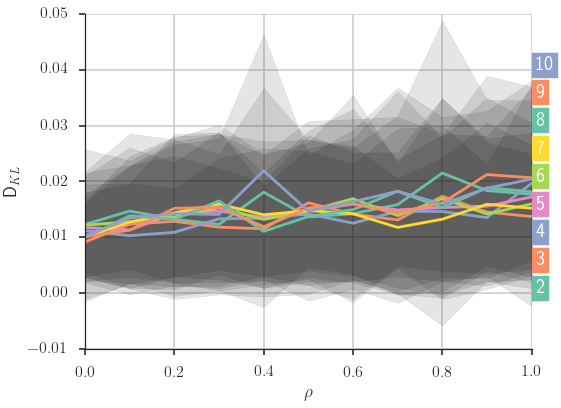

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
rho = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.]

m_dkl = [d[0] for d in dkls]
t_dkl = [d[0]+d[1] for d in dkls]
b_dkl = [d[0]-d[1] for d in dkls]

for count, A in enumerate([2,3,4,5,6,7,8,9,10]):
    curr_handle, = ax.plot(rho, m_dkl[count*11:count*11+11])
    ax.fill_between(rho, b_dkl[count*11:count*11+11], 
                    t_dkl[count*11:count*11+11], color='k', 
                    alpha=0.1)
    ax.text(1.01, .05/10.*A-0.01,
                        '{}'.format(A),
                        fontweight='bold',
                        backgroundcolor=curr_handle.get_color(),
                        color='w')

# ax.text(.83, 0.08, 'A')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'D$_{KL}')
ax.grid()
sns.despine()
# plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/DKL_param_scan.png', bbox_inches='tight')